<a href="https://colab.research.google.com/github/DiegoOrduna/GoogleColab/blob/master/exam_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


#MINERIA DE DATOS
##ICI 9°
#####EXAMEN 1° PARCIAL - Limpieza de datos
* Omar Muro Martínez - 252312
* nombre2 
* Diego Antonio Orduña Salas - 229323
* nombre4
* nombre5


---




###Importación de librerías y lectura de datos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("/content/sample_data/winemag-data-130k-v2.csv")
df.head(100)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,France,"This is a dense wine, packed with both tannins...",NaN,88,20.0,Beaujolais,Juliénas,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy
96,96,France,The wine comes from one of the cru estates fol...,NaN,88,18.0,Beaujolais,Régnié,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy
97,97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill
98,98,Italy,"Forest floor, menthol, espresso, cranberry and...",Dono Riserva,88,30.0,Tuscany,Morellino di Scansano,NaN,Kerin O’Keefe,@kerinokeefe,Serpaia di Endrizzi 2010 Dono Riserva (Morell...,Sangiovese,Serpaia di Endrizzi


### Encontrando y visualizando valores perdidos (None, NaN)



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


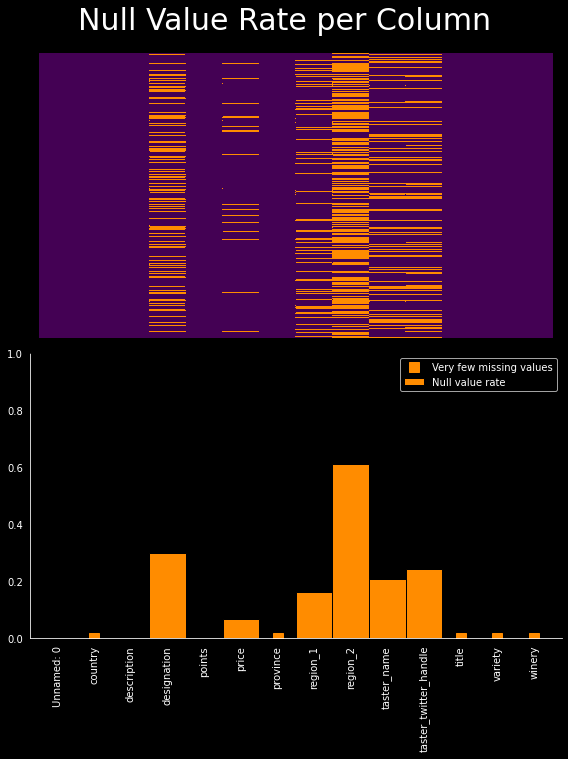

In [ ]:
def nullscan(df_check, save=False):
    

    df_nulls = df_check.isna()
    
    nulls_per_col = df_nulls.sum(axis=0)
    nulls_per_col /= len(df_check.index)

    with plt.style.context('dark_background'):
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
        vir = matplotlib.cm.get_cmap('viridis')
        colormap = matplotlib.colors.ListedColormap([vir(0), 'darkorange'])
        sns.heatmap(df_check.isnull(), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
    
        nulls_per_col.plot(kind='bar', color='darkorange', x=nulls_per_col.values, 
                           y=nulls_per_col.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
        
        ax2.set_ylim((0,1))
        labels=df_check.columns
        ticks = np.arange(0.5, len(labels))
        ax2.xaxis.set(ticks=ticks, ticklabels=labels)
    

        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_color('black')
        
        na_ticks = ticks[(nulls_per_col > 0) & (nulls_per_col < 0.05)]
        if (len(na_ticks) > 0):
            ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
                     label='Very few missing values')
    
        fig.suptitle('Null Value Rate per Column', fontsize=30, y=1.05)
        ax2.legend()
        fig.tight_layout() 
        if(save):
            plt.savefig('nullscan.png')
        plt.show()
nullscan(df)

### Manejo de valores faltantes



Como sabemos, existen diferentes técnicas para lidiar con valores faltantes

* Descarte filas que contengan una cantidad de valores nulos. Use este método solo si el número de valores faltantes dentro de la fila respectiva es muy alto.
* Descarte las columnas que contengan una cantidad específica de valores nulos si la columna no es demasiado relevante y la cantidad de valores que faltan es muy alta. 
* Reemplace los valores faltantes con el promedio de la columna. El valor más común de una característica categórica y la mediana o la media de una característica numérica pueden interpretarse como el promedio de la columna respectiva.
* Reemplace el valor faltante con un valor predicho. Por lo tanto, uno podría usar cualquier algoritmo de aprendizaje automático.
* Reemplace los valores faltantes con ceros o 'Desconocido' y trátelos como cualquier otro valor si es posible


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


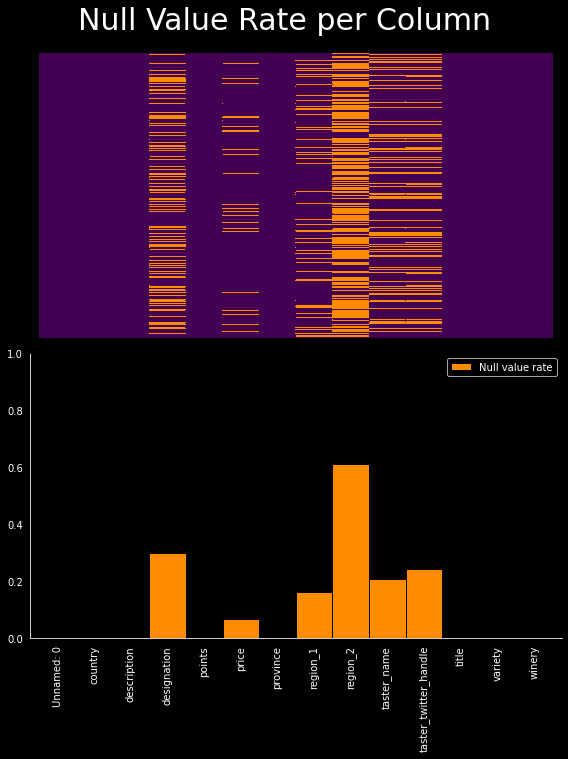

In [ ]:
# Drop Rows
# drop all rows with Null values in 'country', 'province' OR 'variety':
df = df.dropna(subset=['country', 'province', 'variety'])
nullscan(df, save=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


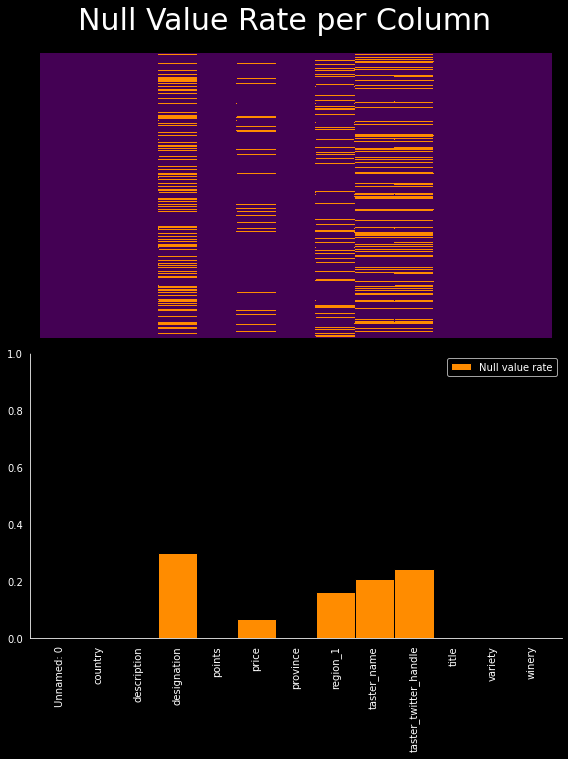

In [ ]:
# Drop Columns
df = df.drop('region_2', axis=1)

nullscan(df)

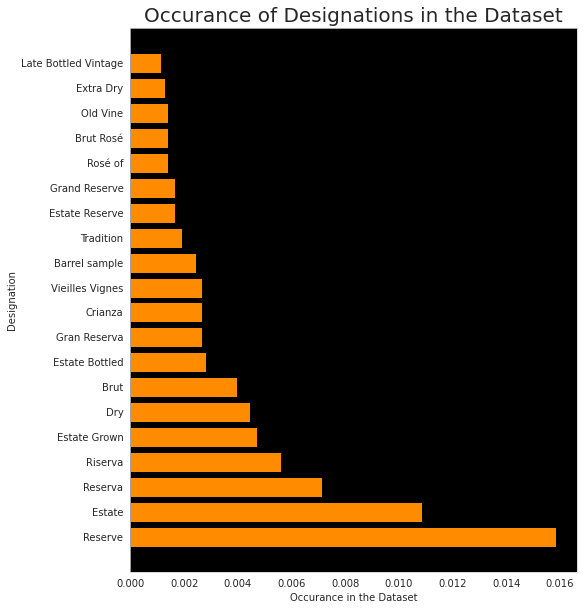

In [ ]:
# Replace Null values with 'Unknown' or 0
# la columna "designation" es la segunda con más valores faltantes

designation = df['designation'].value_counts().head(20) / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax.barh(y=designation.index, width=designation.values, color='darkorange', edgecolor='black')
ax.set_title('Occurance of Designations in the Dataset', fontsize=20)
ax.set_xlabel('Occurance in the Dataset')
ax.set_ylabel('Designation')
ax.set_facecolor('black')

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


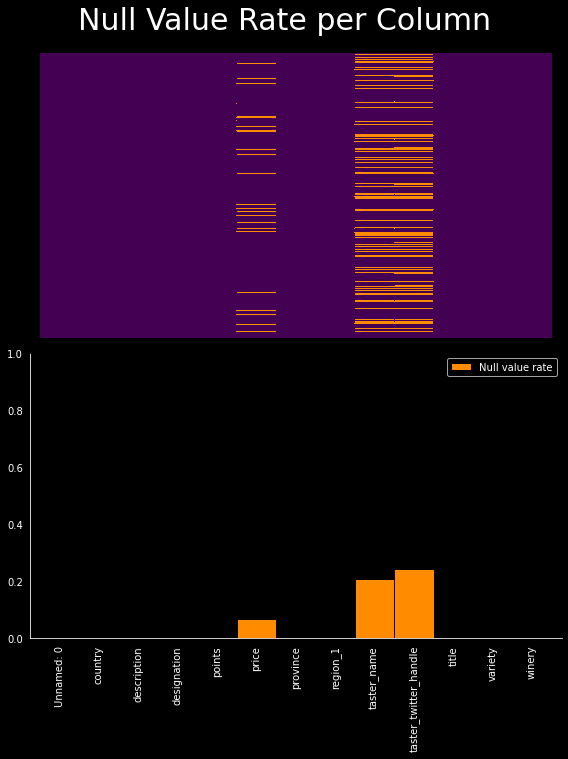

In [ ]:
df[['designation', 'region_1']] = df[['designation', 'region_1']].fillna('Unknown')
nullscan(df)

rows containing a name but no twitter handle: 257
rows containing a twitter handle but no taster name: 0


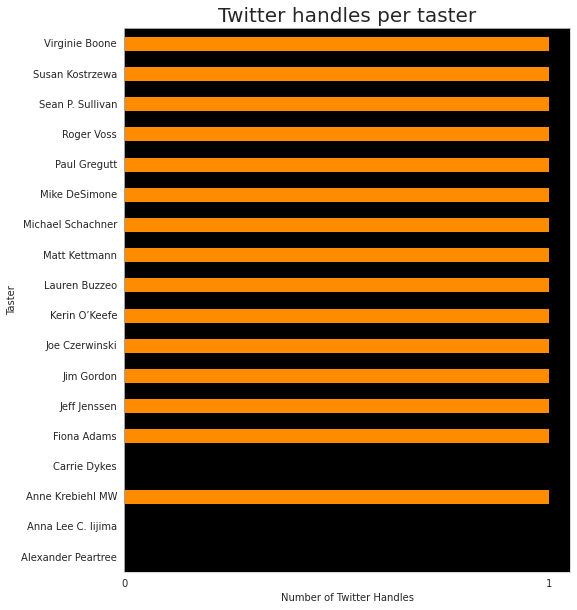

In [ ]:
# manejo de inconsistencias taster_twitter_handle y taster_name

only_name = df.loc[df['taster_twitter_handle'].isnull() & df['taster_name'].notna(), 
                   ['taster_name', 'taster_twitter_handle']]
num_only_name = len(only_name.index)

only_twitter = df.loc[df['taster_name'].isnull() & df['taster_twitter_handle'].notna(), 
                      ['taster_name', 'taster_twitter_handle']]
num_only_twitter = len(only_twitter.index)

print(f'rows containing a name but no twitter handle: {num_only_name}'
      + f'\nrows containing a twitter handle but no taster name: {num_only_twitter}')

twitter_per_name = df.groupby('taster_name')['taster_twitter_handle'].nunique()
labels = twitter_per_name.index


fig, ax = plt.subplots(figsize=(8,10))
twitter_per_name.plot(kind='barh', ax=ax, color='darkorange', edgecolor='black')
ax.set_xticks([0,1])
ax.set_xlabel('Number of Twitter Handles')
ax.set_ylabel('Taster')
ax.set_title('Twitter handles per taster', fontsize=20)
ax.set_facecolor('black')

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


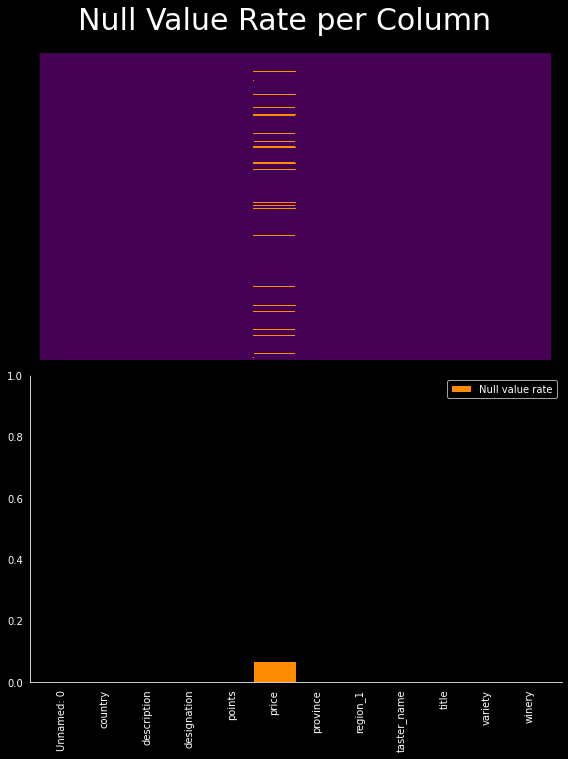

In [ ]:
df = df.drop('taster_twitter_handle', axis=1)
df['taster_name'] = df['taster_name'].fillna('Unknown')
nullscan(df)

### Place missing values with predicted values

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


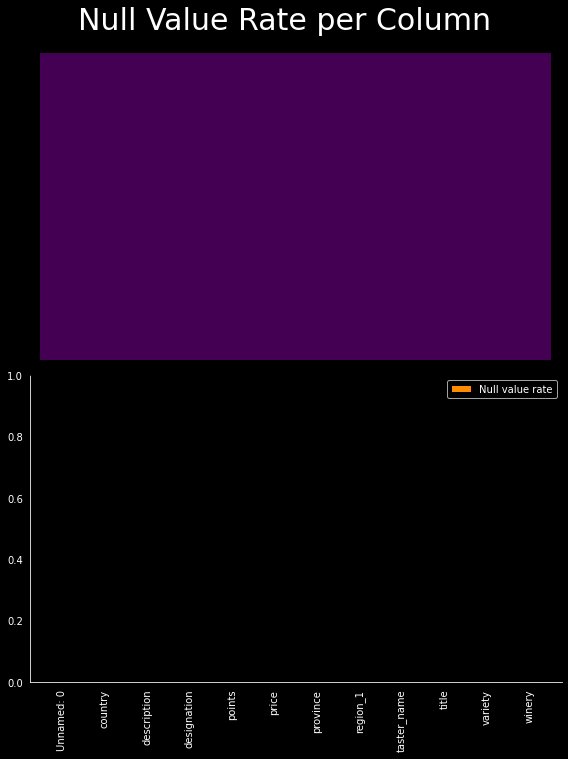

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,161,US,A hearty blend of 76% Zinfandel and 24% Petite...,Mr. Nibbles,91,35.0,California,Paso Robles,Matt Kettmann,Chronic Cellars 2013 Mr. Nibbles Red (Paso Rob...,Red Blend,Chronic Cellars
1,7215,Portugal,The wine has a jammy character that gives it c...,Vintage,90,66.0,Port,Unknown,Roger Voss,Quinta do Crasto 2015 Vintage (Port),Port,Quinta do Crasto
2,307,France,"Rich and full in the mouth, packed with red fr...",Les Dames Huguettes,87,30.0,Burgundy,Côte de Nuits-Villages,Roger Voss,Domaine Bertagna 2009 Les Dames Huguettes (Cô...,Pinot Noir,Domaine Bertagna
3,1398,Germany,Flavors of pressed apple and pears are uncompl...,Kaseler Dominikaner,88,16.0,Mosel,Unknown,Anna Lee C. Iijima,C. von Nell-Breuning 2014 Kaseler Dominikaner ...,Riesling,C. von Nell-Breuning
4,1934,Australia,Mint marks the nose of this otherwise darkly a...,Reiver,87,53.0,South Australia,Barossa Valley,Joe Czerwinski,Mitolo 2009 Reiver Shiraz (Barossa Valley),Shiraz,Mitolo


In [ ]:
df_cleanup = df.loc[:, ['price', 'points', 'country', 'taster_name']]
encoded = pd.get_dummies(df_cleanup[['country', 'taster_name']], prefix=['country', 'taster_name'])
df_cleanup = pd.concat([df_cleanup.drop(['country', 'taster_name'], axis=1), encoded], axis=1)

# training data
df_cleanup_known = df_cleanup.loc[df_cleanup['price'].notnull(), :]
X_known = df_cleanup_known.drop('price', axis=1)
y_known = df_cleanup_known['price']

# prediction data
df_cleanup_unknown = df_cleanup.loc[df_cleanup['price'].isnull(), :]
X_unknown = df_cleanup_unknown.drop('price', axis=1)

from sklearn.model_selection import GridSearchCV
knn_cleanup = KNeighborsRegressor()

# simple finetuning:
params = {'n_neighbors':[1,5,9]}
gs = GridSearchCV(knn_cleanup, params)
gs.fit(X_known, y_known)
knn_cleanup = gs.best_estimator_

df_known = df.loc[df['price'].notnull(),:]
df_predicted = df.loc[df['price'].isnull(),:]

# to evade SettingWithCopyWarning
df_predicted = df_predicted.drop('price', axis=1)
df_predicted['price'] = knn_cleanup.predict(X_unknown)
df = pd.concat([df_known, df_predicted], axis=0, ignore_index=True)

# shuflle the dataset along rows
df = df.sample(frac=1).reset_index(drop=True)



nullscan(df)
df.head()